# **Bond management**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('bond.xlsx')
df

,Bond_name,Date_created,Coupon,Maturity,Price,Day_count_convention
0,GTII10:GOV 10 Years,2014-01-01,0.030,2024-01-01,$1000,ACT/365
1,GTII20: GOV 20 Years,2004-01-01,0.035,2024-01-01,$950,ACT/365
2,GTII30: GOV 30 Years,1994-01-01,0.040,2024-01-01,$980,ACT/365


# **Accreud interest calculations**
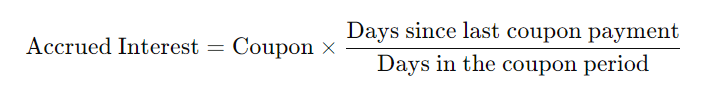

In [7]:
from datetime import datetime

# Function to calculate accrued interest
def calculate_accrued_interest(coupon_rate, date_created, maturity_date, day_count_convention, price):
    # Convert the dates to datetime
    today = datetime.today()
    # date_created = date_created
    # maturity_date = datetime.strptime(maturity_date, '%Y-%m-%d')

    # Assuming bond pays annual coupon, so last coupon payment was exactly a year ago from today
    last_coupon_payment_date = datetime(today.year - 1, today.month, today.day)

    # Day count convention: ACT/365 means actual days / 365
    if day_count_convention == "ACT/365":
        days_since_last_coupon = (today - last_coupon_payment_date).days
        days_in_coupon_period = 365
    else:
        raise ValueError("Day count convention not supported")

    # Convert price from string to float by stripping '$'
    price = float(price.replace('$', ''))

    # Annual coupon payment
    annual_coupon = coupon_rate * price

    # Calculate accrued interest
    accrued_interest = annual_coupon * (days_since_last_coupon / days_in_coupon_period)

    return accrued_interest

# Apply the function to each bond in the dataframe
df['Accrued Interest'] = df.apply(
    lambda row: calculate_accrued_interest(row['Coupon'], row['Date_created'], row['Maturity'], row['Day_count_convention'], row['Price']), axis=1
)

# Display the result
df


,Bond_name,Date_created,Coupon,Maturity,Price,Day_count_convention,Accrued Interest
0,GTII10:GOV 10 Years,2014-01-01,0.030,2024-01-01,$1000,ACT/365,30.082192
1,GTII20: GOV 20 Years,2004-01-01,0.035,2024-01-01,$950,ACT/365,33.341096
2,GTII30: GOV 30 Years,1994-01-01,0.040,2024-01-01,$980,ACT/365,39.307397
